In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd

In [0]:
df = pd.read_csv("/content/drive/My Drive/AI/Power-Networks-LCL.csv")

In [0]:
df["DateTime"] = pd.to_datetime(df["DateTime"])

In [5]:
df.head()

,LCLid,stdorToU,DateTime,KWh,Acorn,Acorn_grouped
0,MAC000002,Std,2012-10-12 00:30:00,0.0,ACORN-A,Affluent
1,MAC000002,Std,2012-10-12 01:00:00,0.0,ACORN-A,Affluent
2,MAC000002,Std,2012-10-12 01:30:00,0.0,ACORN-A,Affluent
3,MAC000002,Std,2012-10-12 02:00:00,0.0,ACORN-A,Affluent
4,MAC000002,Std,2012-10-12 02:30:00,0.0,ACORN-A,Affluent


In [6]:
ser = df.groupby(['DateTime', 'LCLid']).KWh.mean()
display(ser)

DateTime             LCLid    
2011-12-06 13:00:00  MAC000016    0.105
2011-12-06 13:30:00  MAC000016    0.134
2011-12-06 14:00:00  MAC000016    0.141
2011-12-06 14:30:00  MAC000016    0.130
2011-12-06 15:00:00  MAC000016    0.149
2011-12-06 15:30:00  MAC000016    0.131
2011-12-06 16:00:00  MAC000016    0.133
2011-12-06 16:30:00  MAC000016    0.148
2011-12-06 17:00:00  MAC000016    0.128
2011-12-06 17:30:00  MAC000016    0.128
2011-12-06 18:00:00  MAC000016    0.151
2011-12-06 18:30:00  MAC000016    0.257
2011-12-06 19:00:00  MAC000016    0.135
2011-12-06 19:30:00  MAC000016    0.139
2011-12-06 20:00:00  MAC000016    0.199
2011-12-06 20:30:00  MAC000016    0.148
2011-12-06 21:00:00  MAC000016    0.126
2011-12-06 21:30:00  MAC000016    0.146
2011-12-06 22:00:00  MAC000016    0.129
2011-12-06 22:30:00  MAC000016    0.112
2011-12-06 23:00:00  MAC000016    0.056
2011-12-06 23:30:00  MAC000016    0.022
2011-12-07 00:00:00  MAC000016    0.023
2011-12-07 00:30:00  MAC000016    0.042
2011-12-0

In [7]:
new = ser.unstack()
new.tail()

LCLid,MAC000002,MAC000003,MAC000004,MAC000006,MAC000007,MAC000008,MAC000009,MAC000010,MAC000011,MAC000012,MAC000013,MAC000016,MAC000018,MAC000019,MAC000020,MAC000021,MAC000022,MAC000023,MAC000024,MAC000025,MAC000026,MAC000027,MAC000028,MAC000029,MAC000030,MAC000032,MAC000033,MAC000034,MAC000035,MAC000036
DateTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-02-27 22:00:00,0.416,0.042,0.167,0.067,0.282,NaN,0.193,0.534,0.171,0.055,0.132,NaN,0.376,0.193,0.204,0.500,0.268,0.421,0.233,0.011,0.516,0.171,NaN,0.063,0.166,0.067,0.238,0.188,0.698,NaN
2014-02-27 22:30:00,1.350,0.117,0.000,0.047,0.346,NaN,0.338,0.478,0.145,0.049,0.126,NaN,0.379,0.180,0.213,0.475,0.243,0.421,0.353,0.019,0.401,0.137,NaN,0.060,0.354,0.051,0.144,0.176,0.625,NaN
2014-02-27 23:00:00,1.247,0.064,0.000,0.014,0.168,NaN,0.207,0.584,0.118,0.024,0.147,NaN,0.382,0.185,0.089,0.414,0.227,0.281,0.889,0.005,0.548,0.102,NaN,0.060,0.198,0.047,0.199,0.224,0.628,NaN
2014-02-27 23:30:00,1.218,0.047,0.000,0.039,0.109,NaN,0.130,0.334,0.097,0.000,0.087,NaN,0.383,0.192,0.044,0.526,0.263,0.256,0.091,0.026,0.515,0.222,NaN,0.056,0.062,0.001,0.165,0.244,0.556,NaN
2014-02-28 00:00:00,1.387,0.070,0.081,0.028,0.060,NaN,0.050,0.276,0.112,0.000,0.083,NaN,0.380,0.168,0.060,0.737,0.287,0.160,2.118,0.005,0.272,0.200,NaN,0.055,0.078,2.466,0.253,5.690,0.551,NaN


In [8]:
new.columns

Index(['MAC000002', 'MAC000003', 'MAC000004', 'MAC000006', 'MAC000007',
       'MAC000008', 'MAC000009', 'MAC000010', 'MAC000011', 'MAC000012',
       'MAC000013', 'MAC000016', 'MAC000018', 'MAC000019', 'MAC000020',
       'MAC000021', 'MAC000022', 'MAC000023', 'MAC000024', 'MAC000025',
       'MAC000026', 'MAC000027', 'MAC000028', 'MAC000029', 'MAC000030',
       'MAC000032', 'MAC000033', 'MAC000034', 'MAC000035', 'MAC000036'],
      dtype='object', name='LCLid')

In [0]:
import matplotlib.pyplot as plt

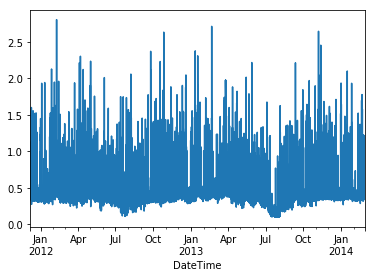

In [10]:
new["MAC000021"].plot()

In [0]:
from heapq import nlargest

no = nlargest(3, new.count())

In [12]:
display(no)
      

[39054, 39051, 39051]

In [13]:
ser = new.count()

for i in no:
  print(ser[ser == i])

LCLid
MAC000018    39054
dtype: int64
LCLid
MAC000020    39051
MAC000021    39051
dtype: int64
LCLid
MAC000020    39051
MAC000021    39051
dtype: int64


In [0]:
new_df = new[["MAC000018", "MAC000020", "MAC000021"]]

In [15]:
new_df.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

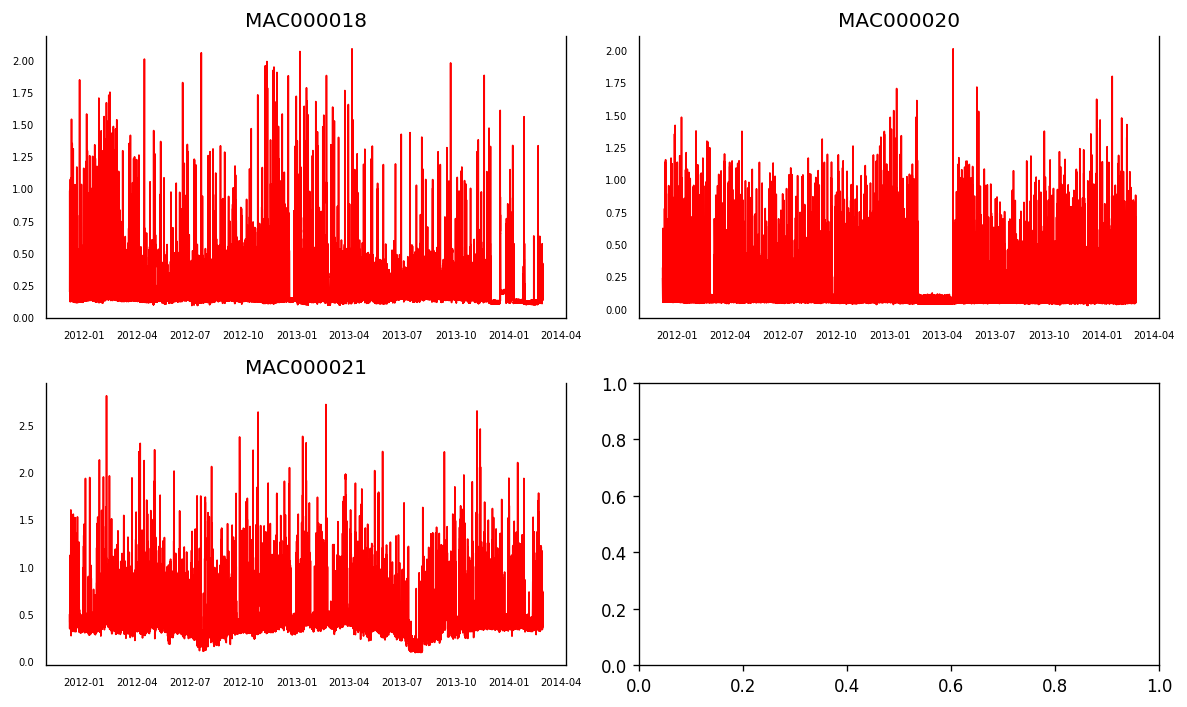

In [17]:
ct = 0
fig, axes = plt.subplots(nrows=2, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
  if ct < 3:
    data = new_df[new_df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(new_df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    ct += 1
plt.tight_layout();

In [18]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(new_df, variables = new_df.columns)

,MAC000018_x,MAC000020_x,MAC000021_x
MAC000018_y,1.0000,0.0,0.0
MAC000020_y,0.0000,1.0,0.0
MAC000021_y,0.0052,0.0,1.0


In [19]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(new_df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
MAC000018 ::  5657.46   > 24.2761   =>   True
MAC000020 ::  2484.77   > 12.3212   =>   True
MAC000021 ::  223.91    > 4.1296    =>   True


In [0]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [21]:
nobs = 12
tr_df, te_df = new_df[0:-nobs], new_df[-nobs:]

# Check size
print(tr_df.shape)  
print(te_df.shape) 

(39043, 3)
(5, 3)


In [22]:
# ADF Test on each column
for name, column in tr_df.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "MAC000018" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -14.1314
 No. Lags Chosen       = 48
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "MAC000020" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -15.7127
 No. Lags Chosen       = 51
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "MAC000021" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significan

In [23]:
model = VAR(tr_df)
x = model.select_order(maxlags=12)
x.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


,AIC,BIC,FPE,HQIC
0,-10.36,-10.36,3.153e-05,-10.36
1,-12.52,-12.52,3.648e-06,-12.52
2,-12.56,-12.55,3.520e-06,-12.56
3,-12.59,-12.58,3.414e-06,-12.59
4,-12.60,-12.59,3.382e-06,-12.59
5,-12.60,-12.59*,3.372e-06,-12.60
6,-12.60,-12.59,3.370e-06,-12.60
7,-12.60,-12.59,3.368e-06,-12.60
8,-12.60,-12.58,3.367e-06,-12.60
9,-12.60,-12.58,3.366e-06,-12.60


In [24]:
model_fitted = model.fit(1)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 25, Aug, 2019
Time:                     11:09:41
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -12.5181
Nobs:                     39042.0    HQIC:                  -12.5199
Log likelihood:           78235.2    FPE:                3.65009e-06
AIC:                     -12.5208    Det(Omega_mle):     3.64896e-06
--------------------------------------------------------------------
Results for equation MAC000018
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.038647         0.001454           26.576           0.000
L1.MAC000018         0.770324         0.003216          239.554           0.000
L1.MAC000020         0.030268         0.003892            7.

In [25]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(new_df.columns, out):
    print(col, ':', round(val, 2))

MAC000018 : 1.99
MAC000020 : 2.05
MAC000021 : 2.27


In [26]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 5

# Input data for forecasting
forecast_input = tr_df.values[-lag_order:]
forecast_input

1


array([[0.382, 0.257, 0.404]])

In [0]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=new_df.index[-nobs:], columns=new_df.columns + '_2d')
#df_forecast = df_forecast.drop(['Day_2d','Hour_2d'], axis = 1)
df_forecast = df_forecast.round(3)

In [28]:
#te_df = te_df.drop(['Day','Hour'], axis = 1)
te_df

LCLid,MAC000018,MAC000020,MAC000021
DateTime,,,
2014-02-27 22:00:00,0.376,0.204,0.500
2014-02-27 22:30:00,0.379,0.213,0.475
2014-02-27 23:00:00,0.382,0.089,0.414
2014-02-27 23:30:00,0.383,0.044,0.526
2014-02-28 00:00:00,0.380,0.060,0.737


In [37]:
cm_df = pd.concat([te_df, df_forecast], axis=1, sort=False)
cm_df

,MAC000018,MAC000020,MAC000021,MAC000018_2d,MAC000020_2d,MAC000021_2d
DateTime,,,,,,
2014-02-27 22:00:00,0.376,0.204,0.500,0.348,0.206,0.428
2014-02-27 22:30:00,0.379,0.213,0.475,0.321,0.176,0.443
2014-02-27 23:00:00,0.382,0.089,0.414,0.299,0.160,0.452
2014-02-27 23:30:00,0.383,0.044,0.526,0.282,0.151,0.457
2014-02-28 00:00:00,0.380,0.060,0.737,0.269,0.145,0.461


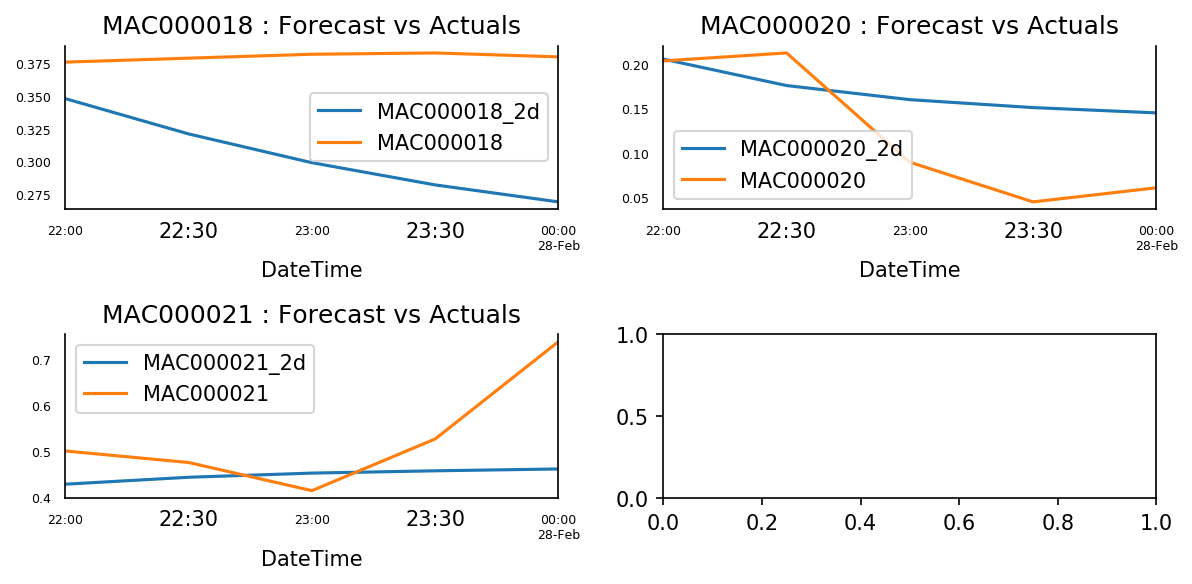

In [38]:
ct = 0
fig, axes = plt.subplots(nrows= 2, ncols=2, dpi=150, figsize=(8,4))
for i, ax in enumerate(axes.flatten()):
  if ct < 3:
    df_forecast[new_df.columns[i] + '_2d'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    te_df[new_df.columns[i]][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(new_df.columns[i] +" : Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    ct += 1

plt.tight_layout();

In [31]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of: MAC000018')
accuracy_prod = forecast_accuracy(df_forecast['MAC000018_2d'].values, te_df['MAC000018'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))
    

print('\nForecast Accuracy of: MAC000020')
accuracy_prod = forecast_accuracy(df_forecast['MAC000020_2d'].values, te_df['MAC000020'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('\nForecast Accuracy of: MAC000021')
accuracy_prod = forecast_accuracy(df_forecast['MAC000021_2d'].values, te_df['MAC000021'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))


Forecast Accuracy of: MAC000018
mape :  0.1998
me :  -0.0761
mae :  0.0761
mpe :  -0.1998
rmse :  0.0818
corr :  -0.7786
minmax :  0.1998

Forecast Accuracy of: MAC000020
mape :  0.9634
me :  0.0455
mae :  0.0601
mpe :  0.8949
rmse :  0.0707
corr :  0.8774
minmax :  0.3834

Forecast Accuracy of: MAC000021
mape :  0.1616
me :  -0.0822
mae :  0.0973
mpe :  -0.1251
rmse :  0.133
corr :  0.4838
minmax :  0.16
